# Qiskit ile Kuantum Programlama Algoritmaları

Bu proje Qiskit ile Kuantum programlamada kullanılan algoritmaları ve örnekleri sunar.  Teleportasyon, Bernstein Vazirani Algoritması, Deutsch Algoritması, Grover Algoritmasını içerir.

<font color="blue">

İçerik:

1. [İlk Devre](#1)
1. [Teleportasyon](#2)

    * [Hadamard Kapısı](#3)
    * [Controlled-X (CX)](#4)
    * [Z Kapısı](#5)
    * [X Kapısı](#6)
    * [Controlled-Z (CZ) Kapısı](#7)

1. [Berstein Vazirani Algoritması](#8)
1. [Deutsch Algoritması](#9)
1. [Grover Algoritması](#10)

<a id="1"></a>
## İlk Devre

In [101]:
from qiskit import *

%matplotlib inline

In [102]:
circuit = QuantumCircuit(2,2)

circuit.draw() yöntemi, oluşturduğunuz kuantum devresinin görsel bir temsilini oluşturur ve bu devrenin içeriğini daha iyi anlamanıza yardımcı olur.

In [103]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

Hadamard kapısının ana fonksiyonları:

 Süperpozisyon Oluşturma: Hadamard kapısı, tek bir kübit üzerinde uygulandığında, kübitin sadece 0 veya 1 durumunda değil, her iki durumun bir kombinasyonunda olduğu bir süperpozisyon durumu yaratır. Örneğin, bir Hadamard geçidi uygulandığında |0⟩ (klasik 0) ve |1⟩ (klasik 1) durumları arasında bir süperpozisyon durumu elde edilir: (|0⟩ + |1⟩) / √2.

In [104]:
circuit.h(0)
circuit.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

In [105]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [106]:
simulator = Aer.get_backend('qasm_simulator')

In [107]:
result = execute(circuit,backend=simulator).result()

In [108]:
from qiskit.visualization import plot_histogram

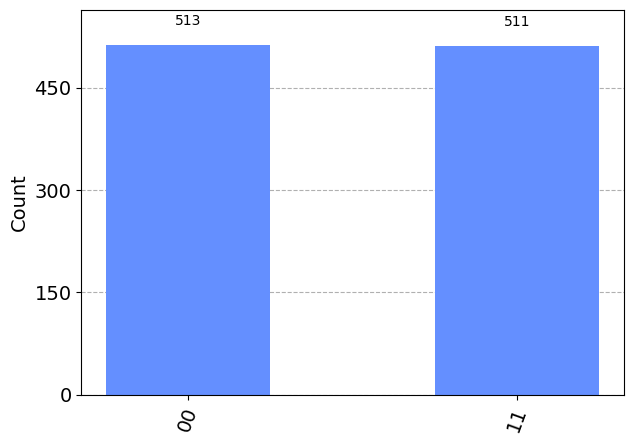

In [109]:
plot_histogram(result.get_counts(circuit))

<a id="2"></a>
## Teleportasyon

Kuantum devreleri veya kuantum algoritmaları oluştururken kullanılan kuantum kapılarının, ölçümlerin ve kuantum durumlarının manipüle edilmesini içerir. Kuantum ışınlanmasının programlanması aşağıdaki adımları içerebilir:

1. Kuantum Devre Tasarımı: İlk adım, kuantum ışınlamanın gerçekleştirileceği kuantum devresinin tasarımını içerir. Bu devre, kaynak parçacığın durumunu ölçerek ve hedef parçacığın durumunu uyarlayarak kuantum ışınlanmanın gerçekleşeceği adımları içerir.

2. Kuantum Kapıları: Kuantum devrelerinin oluşturulmasında kullanılan kuantum kapıları, kuantum bilgisayarların temel işlem birimleridir. Hadamard, CNOT, Toffoli gibi kapılar kuantum durumlarını manipüle etmek için kullanılır.

3. Kuantum Durumları: Kuantum programlama, kuantum durumlarını temsil etmek ve manipüle etmek için matematiksel ifadeler ve kütüphaneler kullanır. Bu durumlar kübitlerin ve kuantum sistemlerinin durumlarını temsil eder.

4. Ölçümler: Kuantum ışınlanma süreci ölçümler aracılığıyla gerçekleştirilir. Kuantum programlama, ölçümleri doğru bir şekilde ayarlamayı ve ölçüm sonuçlarını kullanmayı içerir.

In [110]:
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

import math

In [111]:
# simülatörlerin tanımlanması

qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [112]:
# Tek bir fonksiyon kullanarak tanımladığımız simülatörlerde devremizi çalıştırıyoruz.

def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [113]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

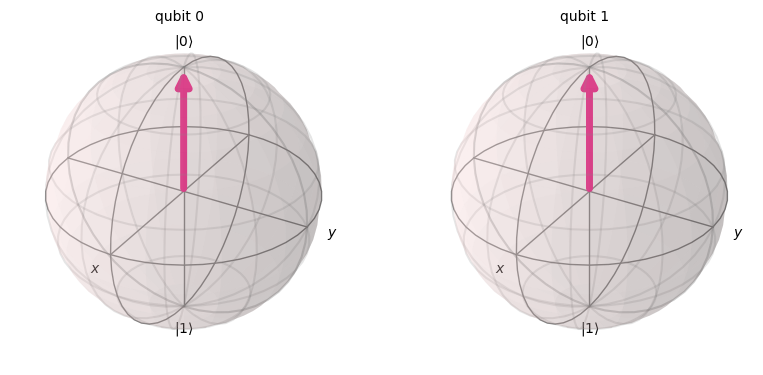

In [114]:
plot_bloch_multivector(statevec)

<a id="3"></a>
Hadamard (H) kapısı: 

Hadamard kapısı kuantum hesaplamada yaygın olarak kullanılan bir kapıdır ve bir kübit üzerinde süperpozisyon oluşturmak için kullanılır.

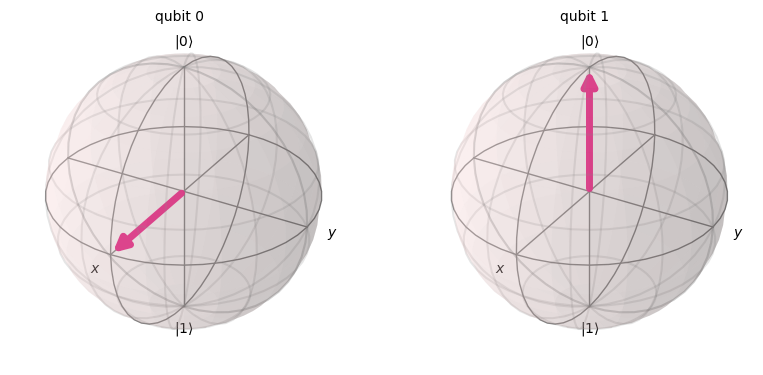

In [115]:
# Qubit 0 hadamard ile süperpozisyon durumuna girer

circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

<a id="4"></a>
 Kontrollü-X (CX) Kapısı:
 
CX kapısı kuantum hesaplamada çok önemli bir kapıdır ve iki kübit arasında kontrollü bir bit çevirme işlemi gerçekleştirir. Bu kapıya CNOT (Kontrollü DEĞİL) kapısı da denir.

Kontrollü-X (CX) kapısının mantığı aşağıdaki gibidir: Bir kontrol kübiti ve bir hedef kübit olmak üzere iki kübit arasında çalışır. Kontrol kübiti 1 (veya Doğru) ise, hedef kübit üzerinde bir bit çevirme (X kapısı) uygulanır. Kontrol kübiti 0 (veya Yanlış) ise, hiçbir işlem yapılmaz.

Bu kapı kuantum devrelerinde birçok farklı hesaplama ve mantıksal işlem gerçekleştirmek için kullanılır. Kontrollü kapıların genel bir sınıfını temsil eder ve çeşitli kuantum algoritmalarında kullanılır.

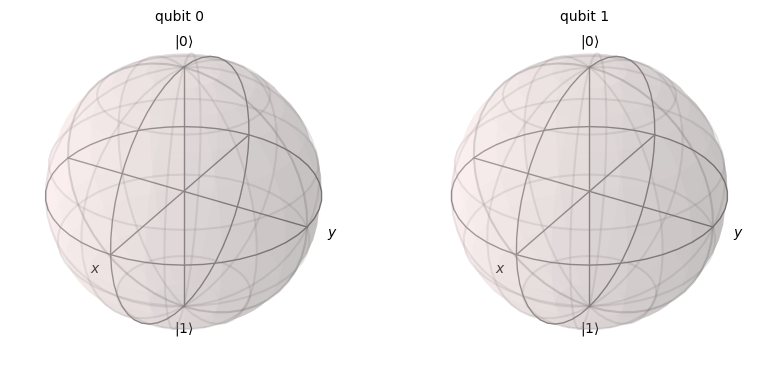

In [116]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)  # Controlled-X (CX)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

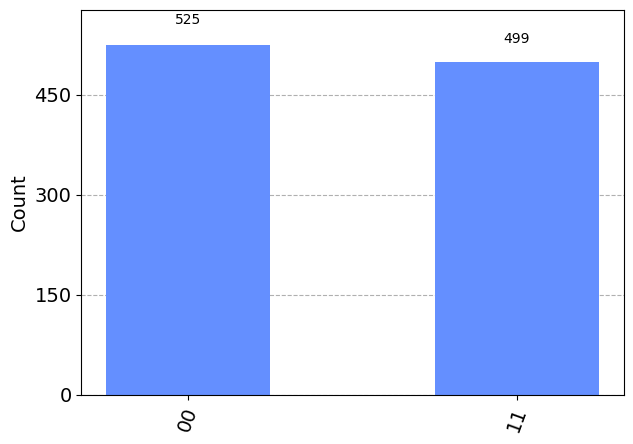

In [117]:
plot_histogram([counts])

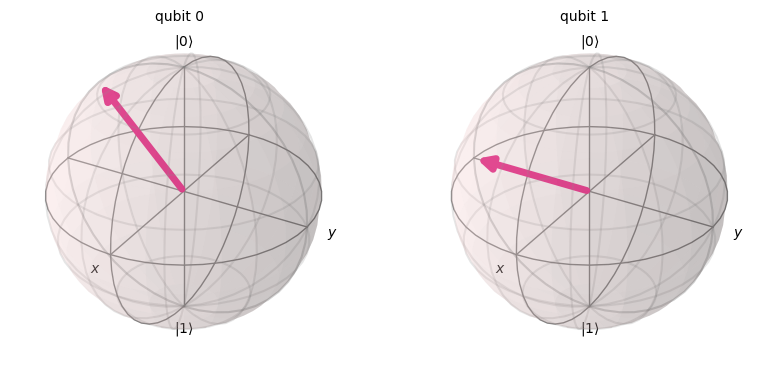

In [118]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)     # rx() , X ekseninde döndürme gerçekleştirir.
circuit.rx(math.pi / 2, 1)   # rx() , X ekseninde döndürme gerçekleştirir.
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

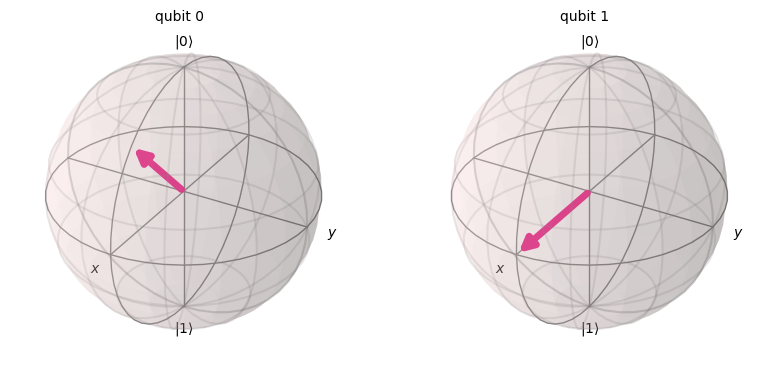

In [119]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0)     # ry() , Y ekseninde döndürme gerçekleştirir.
circuit.ry(math.pi / 2, 1)   # ry() , Y ekseninde döndürme gerçekleştirir.
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

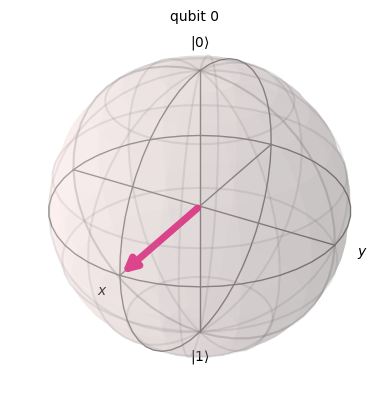

In [120]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

<a id="5"></a>
Z Kapısı:

circuit.z(0) ifadesi, bir kuantum devresindeki belirli bir kubite bir Z kapısı uygulamak için kullanılır. Z kapısı kuantum hesaplamada kullanılan temel kapılardan biridir ve Pauli Z matrisine (z-matrisi) karşılık gelir.

Pauli Z matrisi aşağıdaki gibi tanımlanır:


Z = | 1 0 |
    | 0 -1 |

Bu matris 0 durumunu 1 ile ve 1 durumunu -1 ile çarpar, yani bir kubiti yalnızca bir faz değişikliği uygulayarak döndürür. Başka bir deyişle, Z kapısı bir kübit üzerindeki fazı değiştirir.

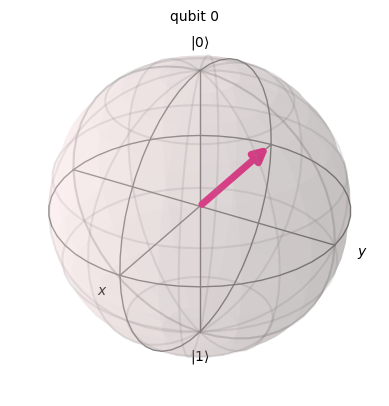

In [121]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)  # Z Kapısı
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

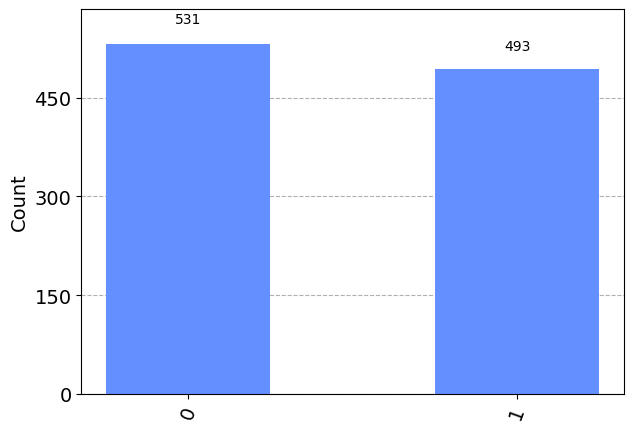

In [122]:
plot_histogram([counts])

<a id="6"></a>
X Kapısı:

Devre.x(0) ifadesi, bir kuantum devresindeki belirli bir kubite bir X kapısı uygulamak için kullanılır. X kapısı kuantum hesaplamadaki temel kapılardan biridir ve Pauli X matrisine (x-matrisi) karşılık gelir.

Pauli X matrisi aşağıdaki gibi tanımlanır:


X = | 0 1 |
    | 1 0 |
    
Bu matris 0 durumunu 1 ile ve 1 durumunu 0 ile değiştirir. Yani, bir kübiti 0 durumundan 1 durumuna veya 1 durumundan 0 durumuna değiştirir. Bu, kübit üzerinde bir "bit çevirme" işlemi gerçekleştirir.

circuit.x(0) kullanırsanız, belirtilen kuantum devresindeki ilk (0 indisli) kübite bir X kapısı uygulanır ve kübitin durumu değişir.

In [123]:
circuit = QuantumCircuit(3,3)

circuit.x(0) # isteğe bağlı, bu örnekte 1. durumu aktarmak istiyoruz

circuit.barrier()

circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

In [124]:
circuit.draw()

┌───┐ ░            ░ 
q_0: ┤ X ├─░────────────░─
     └───┘ ░ ┌───┐      ░ 
q_1: ──────░─┤ H ├──■───░─
           ░ └───┘┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░─
           ░      └───┘ ░ 
c: 3/═════════════════════

In [125]:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ──────░──────┤ X ├─░────────────░─
           ░      └───┘ ░            ░ 
c: 3/══════════════════════════════════

In [126]:
circuit.measure([0, 1], [0, 1])

circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─
           ░      └───┘ ░            ░  ║  ║  ░ 
c: 3/═══════════════════════════════════╩══╩════
                                        0  1

In [127]:
circuit.measure([0, 1], [0, 1])

circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ ┌─┐    ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─┤M├────░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ └╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──╫─┤M├─░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░──╫──╫──░─
           ░      └───┘ ░            ░  ║  ║  ░  ║  ║  ░ 
c: 3/═══════════════════════════════════╩══╩═════╩══╩════
                                        0  1     0  1

<a id="7"></a>
Kontrollü-Z (CZ) Kapısı:

CZ kapısı iki kübit arasında çalışır ve hedef kübit üzerindeki bir kontrol kübitindeki faz durumunu etkiler. Kontrol kubiti 1 (veya Doğru) durumundaysa, Z geçidi hedef kubit üzerine uygulanır ve faz durumu değişir. Kontrol kubiti 0 (veya Yanlış) ise, herhangi bir işlem yapılmaz.

Kontrollü Z kapısının matrisi aşağıdaki gibidir:


CZ = | | 1 0 0 0 0 |
     | 0 1 0 0 |
     | 0 0 1 0 |
     | 0 0 0 -1 |
     
Kontrollü Z kapısı kuantum hesaplamada çeşitli işlemler ve kapı kombinasyonları için kullanılır. Özellikle, CZ kapısı iki kübit arasındaki dolaşıklık durumunu değiştirmek için kullanılabilir.

In [128]:
circuit.cx(1, 2)
circuit.cz(0, 2)  # Controlled-Z (CZ) Kapısı
circuit.measure([2], [2])
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ ┌─┐    ░            
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─┤M├────░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║  ░  ║  ║  ░ └───┘   └╥┘
c: 3/═══════════════════════════════════╩══╩═════╩══╩═════════════╩═
                                        0  1     0  1             2

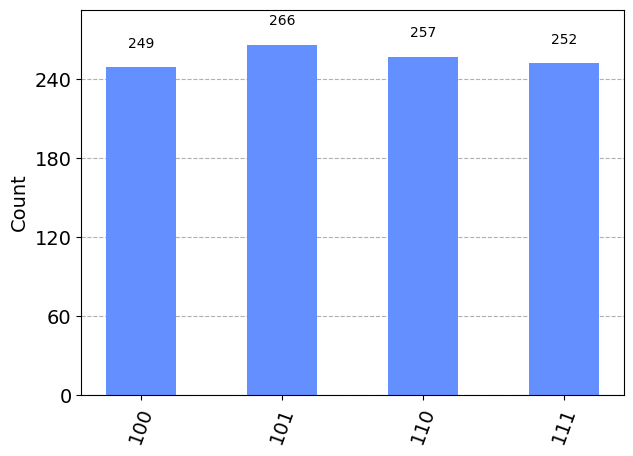

In [129]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

<a id="8"></a>
## Bernstein Vazirani

Bernstein-Vazirani Algoritması, kuantum bilgisayarlar tarafından belirli bir gizli bit dizisini bulmak için kullanılan bir kuantum hesaplama algoritmasıdır. Klasik bir bilgisayar böyle bir dizi keşfi için doğrusal zaman gerektirirken, Bernstein-Vazirani Algoritması bu işlemi kuantum paralelleştirme kullanarak sabit zamanda gerçekleştirir.

Bu algoritma özellikle sınırlı sayıda soruda doğru cevabı veren "sihirli" bir fonksiyonun olduğu bir senaryoda kullanışlıdır. Algoritma, bu sihirli fonksiyonun gizli giriş bit dizisini belirlemek için sihirli fonksiyonun sonuçlarını kullanır.

Bernstein-Vazirani Algoritmasının mantığı aşağıdaki adımlardan oluşur:

1. Bir kübit dizisi oluşturulur. Bu dizi üzerinde Hadamard kapıları uygulanarak tüm durumlar arasında bir süperpozisyon oluşturulur.
2. Sihirli fonksiyon, gizli bit dizisine göre şekillendirilmiş bir kapı olarak kübitlere uygulanır.
3. Son olarak, Hadamard kapıları tekrar kübitlere uygulanır ve elde edilen kübit dizisi ölçülür.

Algoritma, bu adımların sonucunda gizli bit dizisini belirlemek üzere tasarlanmıştır. Bu algoritma, klasik bilgisayarlar için karmaşık olan bir problemi daha hızlı çözmek için kuantum paralelleştirmeden yararlanır.

In [130]:
secretNumber = '10101010100'

In [131]:
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

In [132]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

index0 is 0
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 1
index9 is 0
index10 is 1


In [133]:
circuit.draw()

┌───┐      ░                           ░ ┌───┐ ░ ┌─┐                     »
 q_0: ┤ H ├──────░───────────────────────────░─┤ H ├─░─┤M├─────────────────────»
      ├───┤      ░                           ░ ├───┤ ░ └╥┘┌─┐                  »
 q_1: ┤ H ├──────░───────────────────────────░─┤ H ├─░──╫─┤M├──────────────────»
      ├───┤      ░                           ░ ├───┤ ░  ║ └╥┘┌─┐               »
 q_2: ┤ H ├──────░───■───────────────────────░─┤ H ├─░──╫──╫─┤M├───────────────»
      ├───┤      ░   │                       ░ ├───┤ ░  ║  ║ └╥┘┌─┐            »
 q_3: ┤ H ├──────░───┼───────────────────────░─┤ H ├─░──╫──╫──╫─┤M├────────────»
      ├───┤      ░   │                       ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐         »
 q_4: ┤ H ├──────░───┼────■──────────────────░─┤ H ├─░──╫──╫──╫──╫─┤M├─────────»
      ├───┤      ░   │    │                  ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐      »
 q_5: ┤ H ├──────░───┼────┼──────────────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────»
      ├───┤      ░   │    │                  ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   »
 q_6: ┤ H ├──────░───┼────┼────■─────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───»
      ├───┤      ░   │    │    │             ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
 q_7: ┤ H ├──────░───┼────┼────┼─────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├»
      ├───┤      ░   │    │    │             ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘»
 q_8: ┤ H ├──────░───┼────┼────┼────■────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │        ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ »
 q_9: ┤ H ├──────░───┼────┼────┼────┼────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │        ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ »
q_10: ┤ H ├──────░───┼────┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║ »
q_11: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫─»
      └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║ »
c: 11/══════════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═»
                                                        0  1  2  3  4  5  6  7 »
«               
« q_0: ─────────
«               
« q_1: ─────────
«               
« q_2: ─────────
«               
« q_3: ─────────
«               
« q_4: ─────────
«               
« q_5: ─────────
«               
« q_6: ─────────
«               
« q_7: ─────────
«      ┌─┐      
« q_8: ┤M├──────
«      └╥┘┌─┐   
« q_9: ─╫─┤M├───
«       ║ └╥┘┌─┐
«q_10: ─╫──╫─┤M├
«       ║  ║ └╥┘
«q_11: ─╫──╫──╫─
«       ║  ║  ║ 
«c: 11/═╩══╩══╩═
«       8  9  10

In [134]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10101010100': 1}


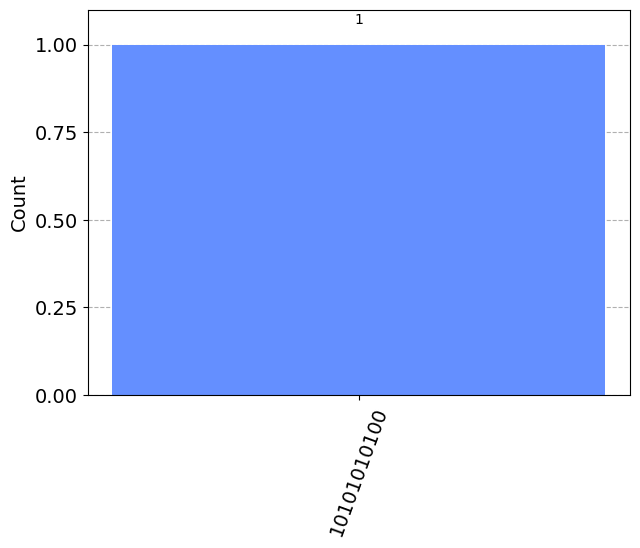

In [135]:
plot_histogram([counts])

<a id="9"></a>
## Deutsch Algoritması

Deutsch Algoritması, kuantum bilgisayarlar tarafından sınırlı sayıda soruda doğru cevap veren bir "sihirli" fonksiyonun kararlı mı yoksa kararsız mı olduğunu belirlemek için kullanılan temel bir kuantum hesaplama algoritmasıdır. Algoritma, klasik bir bilgisayar tarafından aynı işlemi gerçekleştirmek için en kötü durumda iki sorgu gerektirirken, Deutsch Algoritması bu durumu yalnızca bir sorgu ile tespit edebilir.

Bu algoritma iki kübit üzerinde çalışır ve aşağıdaki adımlardan oluşur:

Bir kübit dizisi oluşturulur ve Hadamard kapıları ile bir süperpozisyon durumu oluşturulur.
Sihirli fonksiyon, denge veya denge dışı duruma göre şekillendirilmiş bir kapı olarak kübite uygulanır.
İlk kubite bir kez daha Hadamard kapısı uygulanır.
İlk kübit ölçülür.
Algoritmanın sonunda, sihirli fonksiyon dengede ise (eşit olasılıkla sıfır veya bir döndürür), ilk kübit ölçümünün sonucu her zaman sıfır olacaktır. Sihirli fonksiyon kararlı durumdaysa (her iki sonuç da aynı olasılıkla döndürülür), ilk kübit ölçüm sonucu her zaman bir olacaktır.

Deutsch Algoritması kuantum hesaplama kütüphaneleri ile kolayca uygulanabilir. Örneğin, Qiskit gibi kuantum hesaplama kütüphaneleri algoritmayı uygulamak için gereken araçları sağlar. Tam bir kod örneği veya algoritmanın uygulanması hakkında daha fazla ayrıntı için kütüphane belgelerine başvurabilirsiniz.

In [136]:
circuit = QuantumCircuit(2,1)

In [137]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_1: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 1/═════════════

In [138]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw()

┌───┐      ░       ░ ┌───┐ ░ 
q_0: ┤ H ├──────░───■───░─┤ H ├─░─
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘ ░ 
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────░─
     └───┘└───┘ ░ └───┘ ░       ░ 
c: 1/═════════════════════════════

In [139]:
circuit.measure(0,0)

In [140]:
circuit.draw()

┌───┐      ░       ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├─░─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘ ░ └╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────░──╫─
     └───┘└───┘ ░ └───┘ ░       ░  ║ 
c: 1/══════════════════════════════╩═
                                   0

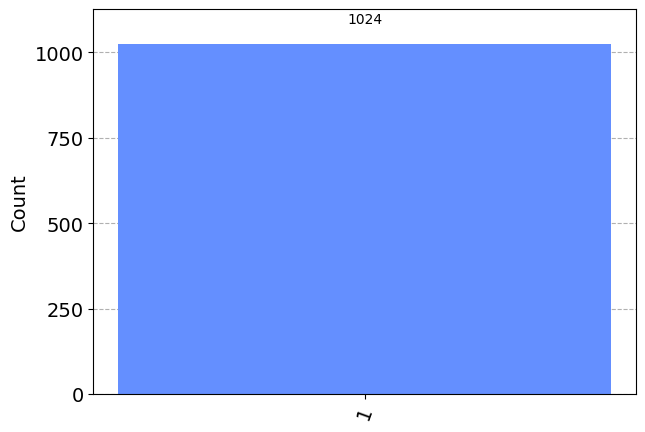

In [141]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

<a id="10"></a>
## Grover Algoritması

Grover Algoritması, kuantum bilgisayarların arama problemlerini çözmek için kullanılan bir kuantum hesaplama algoritmasıdır. Özellikle, belirli bir işlevdeki belirli bir hedef girdiyi bulmak için kullanılır. Klasik algoritmalara benzer şekilde, Grover Algoritması bir veritabanındaki hedef girişi bulmak için de kullanılabilir, ancak kuantum paralelleştirme kullanarak daha hızlı çalışır.

Grover Algoritmasının temel çalışma mantığı, verilen fonksiyon içindeki hedef girişi bulmak için durum genliğini artırmak ve hedef durumu daha olası hale getirmektir. Aşağıda Grover Algoritmasının genel adımları yer almaktadır:

İlk adımda, durum genlikleri eşit olacak şekilde tüm durumları bir süperpozisyon durumuna getirin.
İkinci adımda, hedef girdinin durumunu daha olası hale getirmek için ters çevirin.
Üçüncü adımda, ortalama değeri hesaplayarak hedef durumu daha ayırt edilebilir hale getirin.
İkinci adımı birkaç kez tekrarlayın. Her tekrarda hedef durum daha ayırt edilebilir hale gelir.
Algoritma tamamlandığında, hedef durumu ölçümle bulabilirsiniz.

In [142]:
myList = [5,4,6,9,1,2,3,7,8,0]

In [143]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        response = True
    else:
        response = False
    return response

In [144]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


In [145]:
oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [146]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw()

┌───┐┌────────────────┐
q_0: ┤ H ├┤0               ├
     ├───┤│  oracleCircuit │
q_1: ┤ H ├┤1               ├
     └───┘└────────────────┘
c: 2/═══════════════════════

In [147]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [148]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw()

┌───┐┌────────────────┐┌────────────────────┐┌─┐   
q_0: ┤ H ├┤0               ├┤0                   ├┤M├───
     ├───┤│  oracleCircuit ││  reflectionCircuit │└╥┘┌─┐
q_1: ┤ H ├┤1               ├┤1                   ├─╫─┤M├
     └───┘└────────────────┘└────────────────────┘ ║ └╥┘
c: 2/══════════════════════════════════════════════╩══╩═
                                                   0  1

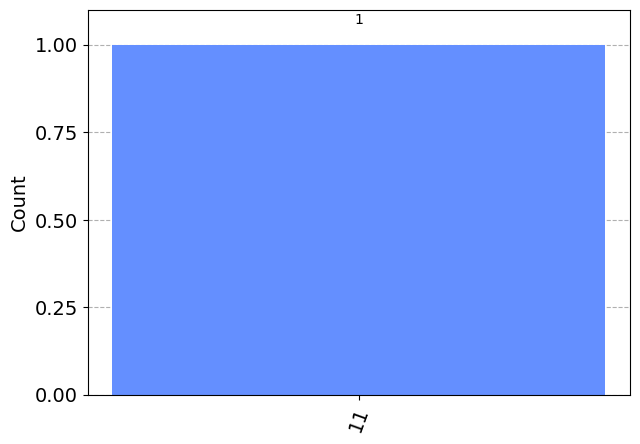

In [149]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])